# 1. Data Load

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
data = pd.read_csv('Customer.csv')
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


## Columns
- 2 개의 숫자 열 :
1. MonthlyCharges : 매월 고객에게 청구되는 금액
2. TotalCharges : 고객에게 청구되는 총 금액

- 19 개의 범주 열 :
1. CustomerID : 각 고객의 고유 한 고객 ID
2. gender : 성별(Female, Male)
3. SenierCitizen : 고객이 노인인지 여부 (1:노인, 0:아님)
4. Partner : 파트너 여부 (Yes, No)
5. Dependents :부양 여부 (Yes, No)
6. tenure : 고객이 회사에 머무른 개월
7. PhoneService : 전화 서비스 여부 (Yes, No)
8. MultipleLines : 고객의 다중 회선 유무 (Yes, No, No phone service)
9. InternetService : 고객의 인터넷 서비스 제공 업체 (DSL, Fiber optic, No)
10. OnlineSecurity :온라인 보안 여부(Yes, No, No internet service)
11. OnlineBackup : 온라인 백업 여부 (Yes, No, No internet service)
12. DeviceProtection 고객이 기기 보호 기능을 제공여부 (Yes, No, No internet service)
13. TechSupport : 기술 지원을 받았는지 (Yes, No, No internet service)
14. StreamingTV :스트리밍 TV여부 (Yes, No, No internet service)
15. StreamingMovies : 스트리밍 영화 여부 (Yes , No, No internet service)
16. contact : 계약 기간 (Month-to-month, One year,Two year)
17. PaperlessBilling :종이 명세서 여부(Yes, No)
18. PaymentMethod : 결제 수단 (Electronic check, Mailed check, Bank transfer (automatic),Credit card (automatic))
19. Churn : 이탈여부 (Yes, No)           

# 2. Null값 처리 및 데이터 전처리


In [3]:
print(data.info(), data.shape,'\n')
print(data.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data = data.drop('customerID', axis=1)
# to_numeric : 똑같은 형식의 숫자로 정렬, errors 옵션 : 숫자 이외의 값을 어떻게 처리할지 설정
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
data[np.isnan(data['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [6]:
# SeniorCitizen : Yes, No

data['SeniorCitizen'] = data['SeniorCitizen'].map({0:'No',1:'Yes'})
payment = {'Electronic check' : 'Electronic', 'Mailed check' : 'Mail', 
           'Bank transfer (automatic)' : 'Bank_tf','Credit card (automatic)':'card'}
data['PaymentMethod'].replace(payment, inplace=True)
data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mail,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mail,53.85,108.15,Yes


# EDA

## Outlier

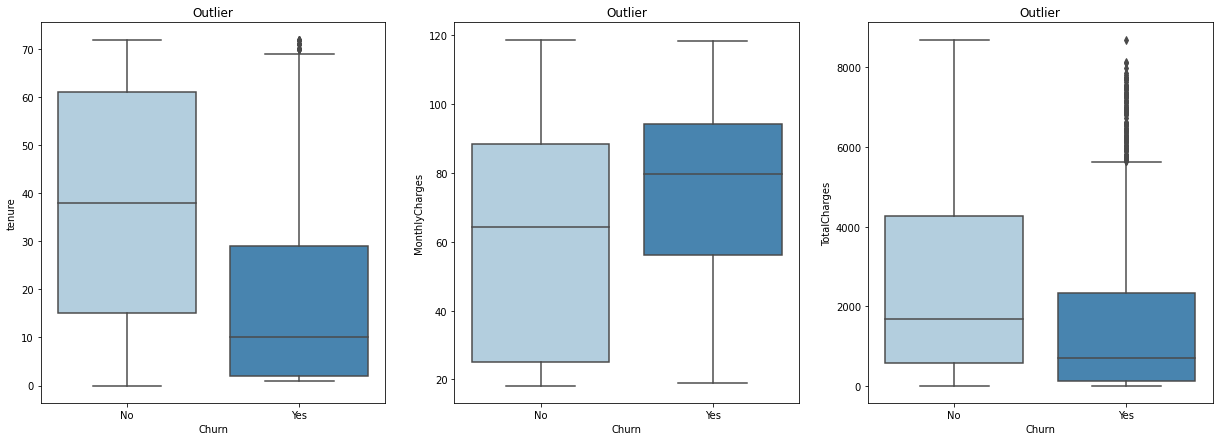

In [7]:
import matplotlib.pyplot as plt

plots = {1:[111],2:[121,122],3:[131,132,133],4:[221,222,223,224],5:[231,232,233,234,235],6:[231,232,233,234,235,236]}

def boxplot(x,y,df):
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i,j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.boxplot(x=x, y=j, data=data[[x,j]], palette='Blues')
        ax.set_title('Outlier')
        
    return plt.show()
boxplot('Churn',['tenure','MonthlyCharges','TotalCharges'],data)

- tenure - churn : 이탈고객은 이탈하지 않은 고객의 중앙값과 비교하면 10개월과 38개월 사이에 많이 분포되어 있다
- MonthlyCharges - Churn : 이탈자의 대부분은 60달러에서 80달러 사이의 월 요금을 납부하며 이용했다
- TotalCharges - Churn : 월요금의 결과라서 데이터가 불균형하며 월 요금이 더 신뢰가 있어 보인다

In [8]:
# TotalCharges 컬럼 null값 MonthlyCharges값대체
data.TotalCharges.fillna(data.MonthlyCharges, inplace=True)
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## [Gender - Churn]

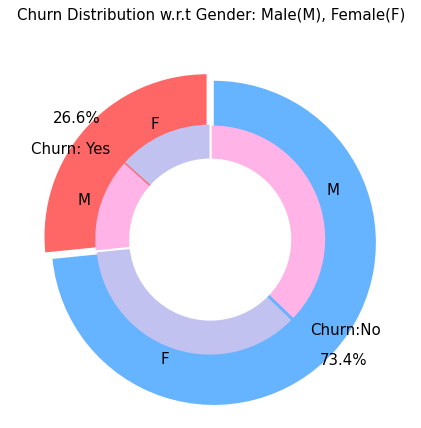

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [10]:
data['Churn'][data['Churn']=='Yes'].groupby(by=data['gender']).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

- **26.6%의 고객이 다른 통신사로 이탈했고, 이탈비율은 남성(Male) : 50.5%, 여성(Female) : 49.5% 입니다**

- 고객이탈에 있어 성별은 고르게 분포되었고 크게 작용하지 않다는 점을 볼 수 있습니다

## [Contract - Churn]

In [11]:
import plotly.express as px
fig = px.histogram(data, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**단기계약자(월단위)들의 이탈이 장기계약자(년단위)들 보다 월등히 이탈을 많이 한다고 나타납니다**

## [PaymentMethod -  Churn]

In [12]:
fig = px.histogram(data, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**대다수의 고객은 Electronic Check(전자결제) 방식을 사용했고, mail,bank_transfer, card 방식 사용 고객의 이탈률이 적다**

## [MultiplyLines,MonthlyCharges - Churn]

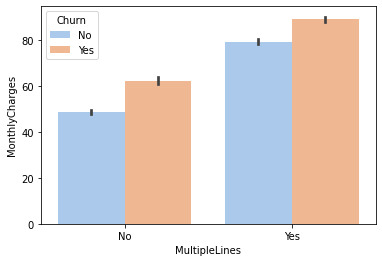

In [13]:
data['MultipleLines'].replace('No phone service','No', inplace=True)
sns.barplot(x='MultipleLines', y = 'MonthlyCharges', hue='Churn',palette = 'pastel', data=data)
plt.show()

- MultipleLine을 이용하는 고객(월 요금을 많이 내는고객)이 이탈을 더 많이 했지만, 많은 차이가 나진 않는다

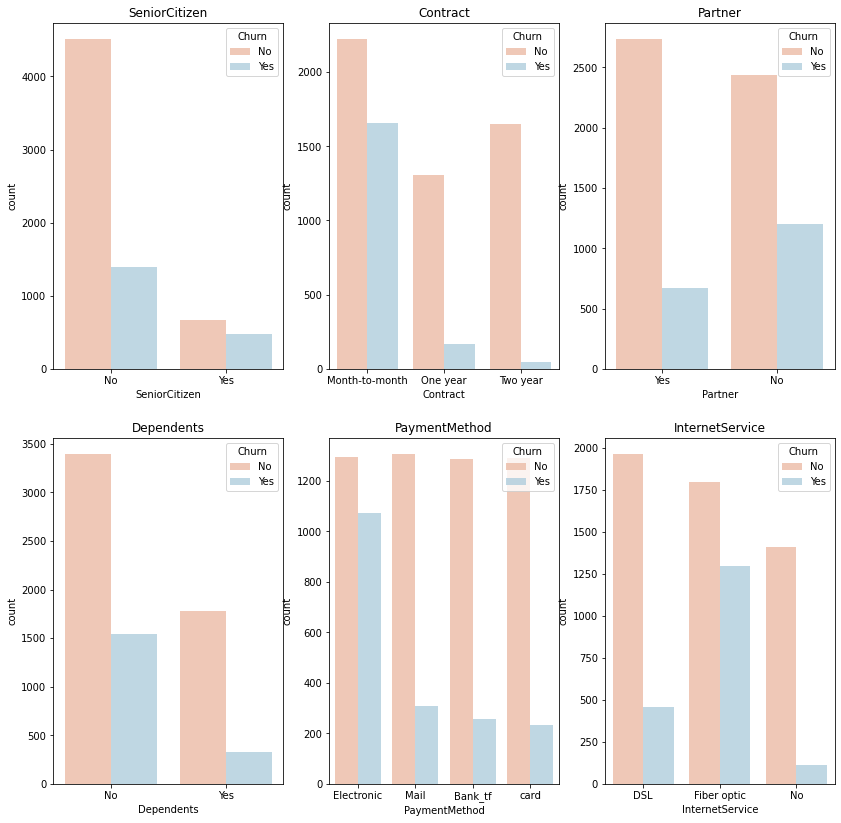

In [14]:

def countplot(x,y,df):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[0])
    
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i , j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=j, hue=x, data= data,  palette = 'RdBu',alpha = 0.8, linewidth=0.4,)
        ax.set_title(j)
    
    return plt.show()
countplot('Churn',['SeniorCitizen','Contract','Partner','Dependents','PaymentMethod','InternetService'],data)

 - 고령자 이탈률은 비고령자 이탈률보다 훨씬 높다
 - 단기(월단위) 계약 해지율은 장기(년단위) 계약 해지률보다 훨씬 높다
 - 파트너가 없는 고객이 파트너가 있는 고객보다 이탈률이 높다
 - 자녀가 없는 고객이 자녀가 있는고객보다 이탈률이 높다
 - 결제 수단이 Electronic 인 고객이 다른 결제 수단보다 이탈률이 월등히 높다
 - InternetService를 Fiber optic으로 사용하는 고객의 이탈률이 월등히 높다

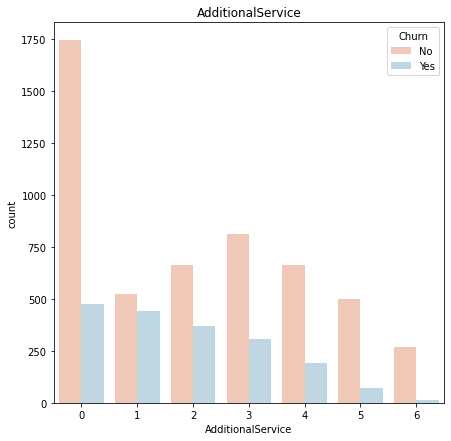

In [15]:
# 부가서비스 사용자만 AdditionalService 컬럼 생성
data['AdditionalService'] = (data[['OnlineSecurity','OnlineBackup',
                                 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]=='Yes').sum(axis=1)
countplot('Churn',['AdditionalService'],data)

- 추가서비스를 통한 인사이트 : 1개의 추가 서비스가 있는 고객의 이탈률이 매우높고
- 추가 서비스가 많아 질수록 고객은 이탈률이 낮아지고 있습니다.

In [16]:
# Addition 이라는 데이터프레임 생성
Addition_df = data['AdditionalService'].value_counts().reset_index()
# 퍼센테이지 단위변경
Addition_df = Addition_df[Addition_df['AdditionalService'] /  Addition_df['AdditionalService'].sum() > 0.01]

# 파이차트 구현
fig = px.pie(Addition_df, values='AdditionalService', names='index',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width = 1)))
fig.show()

In [17]:
data['gender'].replace({'Female':1, 'Male':0}, inplace=True)
# Ordinal Encoding
df = {'Month-to-month':3,'One year': 2,'Two year': 1}
data['Contract'] = data.Contract.map(df)



# Label Encoding / Churn : 이탈안함 - 0 , 이탈 - 1
from sklearn.preprocessing import LabelEncoder
def object_to_int(data_ob):
    if data_ob.dtype == 'object':
        data_ob = LabelEncoder().fit_transform(data_ob)
    return data_ob
data = data.apply(lambda x: object_to_int(x))


In [18]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AdditionalService
0,1,0,1,0,1,0,0,0,0,2,...,0,0,0,3,1,1,29.85,29.85,0,1
1,0,0,0,0,34,1,0,0,2,0,...,0,0,0,2,0,2,56.95,1889.50,0,2
2,0,0,0,0,2,1,0,0,2,2,...,0,0,0,3,1,2,53.85,108.15,1,2
3,0,0,0,0,45,0,0,0,2,0,...,2,0,0,2,0,0,42.30,1840.75,0,3
4,1,0,0,0,2,1,0,1,0,0,...,0,0,0,3,1,1,70.70,151.65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,0,2,0,...,2,2,2,2,1,2,84.80,1990.50,0,5
7039,1,0,1,1,72,1,1,1,0,2,...,0,2,2,2,1,3,103.20,7362.90,0,4
7040,1,0,1,1,11,0,0,0,2,0,...,0,0,0,3,1,1,29.60,346.45,0,1
7041,0,1,1,0,4,1,1,1,0,0,...,0,0,0,3,1,2,74.40,306.60,1,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   int64  
 1   SeniorCitizen      7043 non-null   int32  
 2   Partner            7043 non-null   int32  
 3   Dependents         7043 non-null   int32  
 4   tenure             7043 non-null   int64  
 5   PhoneService       7043 non-null   int32  
 6   MultipleLines      7043 non-null   int32  
 7   InternetService    7043 non-null   int32  
 8   OnlineSecurity     7043 non-null   int32  
 9   OnlineBackup       7043 non-null   int32  
 10  DeviceProtection   7043 non-null   int32  
 11  TechSupport        7043 non-null   int32  
 12  StreamingTV        7043 non-null   int32  
 13  StreamingMovies    7043 non-null   int32  
 14  Contract           7043 non-null   int64  
 15  PaperlessBilling   7043 non-null   int32  
 16  PaymentMethod      7043 

## StandardScaler

In [20]:
# Standard
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
nor_col = ['tenure','MonthlyCharges','TotalCharges']
data[nor_col] = scaler.fit_transform(data[nor_col])
data.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AdditionalService
0,1,0,1,0,-1.277445,0,0,0,0,2,...,0,0,0,3,1,1,-1.160323,-0.992667,0,1


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   int64  
 1   SeniorCitizen      7043 non-null   int32  
 2   Partner            7043 non-null   int32  
 3   Dependents         7043 non-null   int32  
 4   tenure             7043 non-null   float64
 5   PhoneService       7043 non-null   int32  
 6   MultipleLines      7043 non-null   int32  
 7   InternetService    7043 non-null   int32  
 8   OnlineSecurity     7043 non-null   int32  
 9   OnlineBackup       7043 non-null   int32  
 10  DeviceProtection   7043 non-null   int32  
 11  TechSupport        7043 non-null   int32  
 12  StreamingTV        7043 non-null   int32  
 13  StreamingMovies    7043 non-null   int32  
 14  Contract           7043 non-null   int64  
 15  PaperlessBilling   7043 non-null   int32  
 16  PaymentMethod      7043 

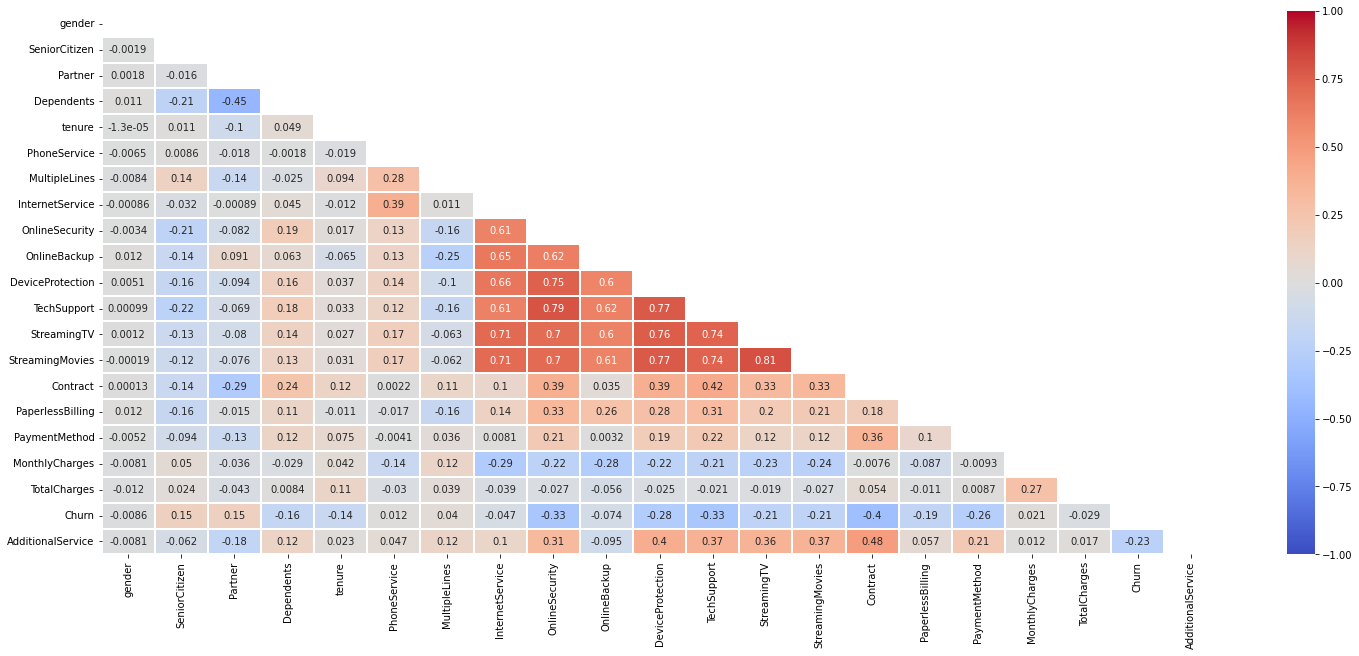

In [22]:
plt.figure(figsize=(25, 10))
corr = data.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [23]:
data.corr()['Churn'].sort_values(ascending = False)

Churn                1.000000
Contract             0.396713
MonthlyCharges       0.193356
PaperlessBilling     0.191825
SeniorCitizen        0.150889
MultipleLines        0.040102
PhoneService         0.011942
gender               0.008612
StreamingTV         -0.036581
StreamingMovies     -0.038492
InternetService     -0.047291
AdditionalService   -0.087698
PaymentMethod       -0.094869
Partner             -0.150448
Dependents          -0.164221
DeviceProtection    -0.178134
OnlineBackup        -0.195525
TotalCharges        -0.198347
TechSupport         -0.282492
OnlineSecurity      -0.289309
tenure              -0.352229
Name: Churn, dtype: float64

# 4. Train Test split

In [24]:
from sklearn.model_selection import train_test_split
y = data['Churn']
X = data.drop('Churn',axis=1)
X.shape, y.shape
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=156, stratify=y)

In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=156)
X_train_o,y_train_o = smote.fit_resample(X_train,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_o.shape, y_train_o.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_o).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (4930, 20) (4930,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (7244, 20) (7244,)
SMOTE 적용 후 레이블 값 분포: 
 0    3622
1    3622
Name: Churn, dtype: int64


# 5. 모델 평가 지표

In [26]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score, classification_report, recall_score
from sklearn.metrics import roc_auc_score
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.2f}, 정밀도: {1:.2f}, 재현율: {2:.2f},\
    F1: {3:.2f},  AUC:{4:.2f}'.format(accuracy, precision, recall, f1, roc_auc))

- Precision_Recall_Curveplot

In [27]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    

# 6. 모델링

0 : 비이탈자 / 1: 이탈자

- 성능 평가지표 : recall

- 회사의 입장에선 이탈을 했는데 이탈을 안했다고 한것을 알아야 운영비용의 낭비가 줄어든다 

## 1) KNN modeling

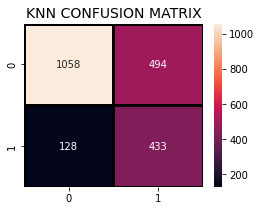

오차 행렬
[[1058  494]
 [ 128  433]]
정확도: 0.71, 정밀도: 0.47, 재현율: 0.77,    F1: 0.58,  AUC:0.79


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score, classification_report, recall_score
from sklearn.metrics import roc_auc_score
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train_o,y_train_o)
knn_pred = knn_model.predict(X_test)
knn_pred_proba = knn_model.predict_proba(X_test)[:,1]

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, knn_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("KNN CONFUSION MATRIX",fontsize=14)
plt.show()
get_clf_eval(y_test, knn_pred, knn_pred_proba)

### KNN - GridSearchCV()

In [29]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors' : np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid=params, cv=5)
knn_cv.fit(X_train, y_train)
knn_best_est = knn_cv.best_estimator_

knn_pred = knn_cv.predict(X_test)
knn_pred_proba = knn_cv.predict_proba(X_test)

print('KNN Best number of neighbors: ', knn_cv.best_params_, '\n')

KNN Best number of neighbors:  {'n_neighbors': 38} 



### KNN 모델개선

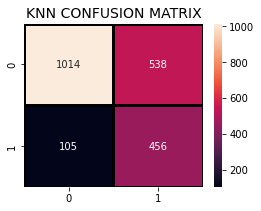

오차 행렬
[[1014  538]
 [ 105  456]]
정확도: 0.70, 정밀도: 0.46, 재현율: 0.81,    F1: 0.59,  AUC:0.81


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score, classification_report, recall_score
from sklearn.metrics import roc_auc_score
import seaborn as sns
knn_model_r = KNeighborsClassifier(n_neighbors =38).fit(X_train_o,y_train_o)
knn_pred_r = knn_model_r.predict(X_test)
knn_pred_proba_r = knn_model_r.predict_proba(X_test)[:,1]

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, knn_pred_r),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("KNN CONFUSION MATRIX",fontsize=14)
plt.show()
get_clf_eval(y_test, knn_pred_r, knn_pred_proba_r)

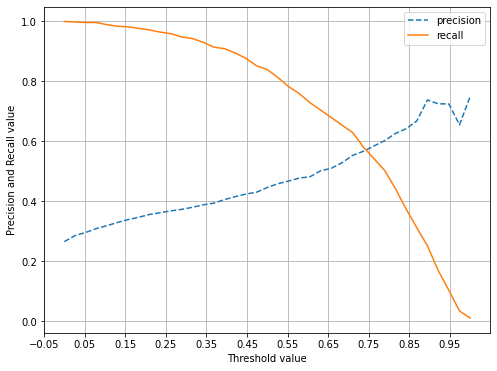

In [32]:
precision_recall_curve_plot( y_test, knn_pred_proba_r)

## DecisionTree Modeling

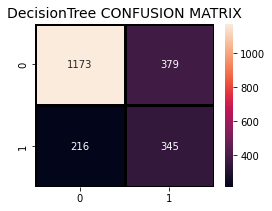

오차 행렬
[[1173  379]
 [ 216  345]]
정확도: 0.72, 정밀도: 0.48, 재현율: 0.61,    F1: 0.54,  AUC:0.69


In [33]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier().fit(X_train_o,y_train_o)
dt_pred = dt_model.predict(X_test)
dt_pred_proba = dt_model.predict(X_test)

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, dt_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("DecisionTree CONFUSION MATRIX",fontsize=14)
plt.show()

get_clf_eval(y_test, dt_pred, dt_pred_proba)

### DecisionTree - GridSearchCV()

In [34]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [2,4,6,8,10,12,14], 'min_samples_split':[2,4,6,8,16], 'min_samples_leaf':[2,4,6,8]}

grid_cv = GridSearchCV(dt_model, param_grid=params, scoring='recall', cv=5, verbose=1,n_jobs=-1 )
grid_cv.fit(X_train_o , y_train_o)
dt_pred = dt_model.predict(X_test)

print('GridSearchCV 최고 재현율 수치:{0:.2f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 140 candidates, totalling 700 fits
GridSearchCV 최고 재현율 수치:0.81
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 2}


### DecisionTree 모델개선

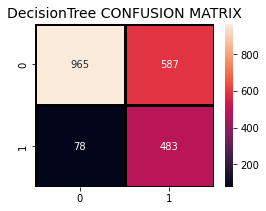

오차 행렬
[[965 587]
 [ 78 483]]
정확도: 0.69, 정밀도: 0.45, 재현율: 0.86,    F1: 0.59,  AUC:0.74


In [35]:
from sklearn.tree import DecisionTreeClassifier

dt_model_r = DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=2).fit(X_train_o,y_train_o)
dt_pred_r = dt_model_r.predict(X_test)
dt_pred_proba_r = dt_model_r.predict(X_test)

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, dt_pred_r),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("DecisionTree CONFUSION MATRIX",fontsize=14)
plt.show()

get_clf_eval(y_test, dt_pred_r, dt_pred_proba_r)

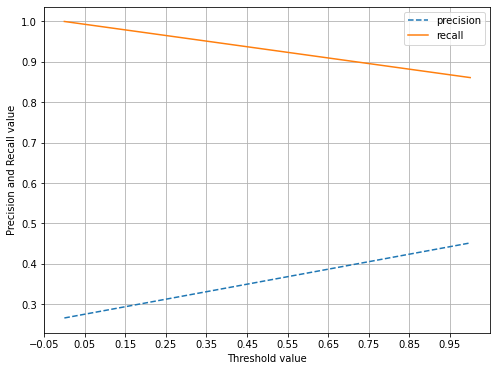

In [36]:
precision_recall_curve_plot( y_test, dt_pred_proba_r)

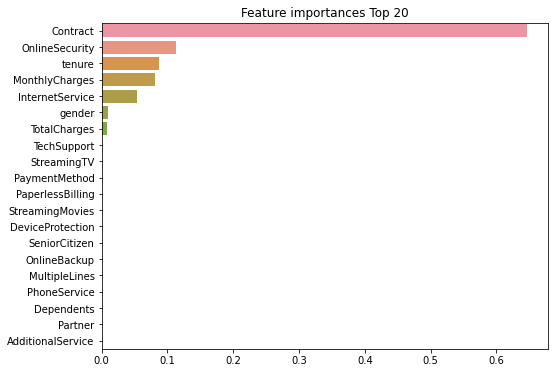

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

ftr_importances_values = dt_model_r.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train_o.columns)

ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')

sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

## XGBoost

[0]	validation_0-auc:0.84914	validation_1-auc:0.82913
[1]	validation_0-auc:0.84957	validation_1-auc:0.83053
[2]	validation_0-auc:0.84996	validation_1-auc:0.83051
[3]	validation_0-auc:0.85098	validation_1-auc:0.83157
[4]	validation_0-auc:0.85303	validation_1-auc:0.83248
[5]	validation_0-auc:0.85367	validation_1-auc:0.83310
[6]	validation_0-auc:0.85453	validation_1-auc:0.83353
[7]	validation_0-auc:0.85474	validation_1-auc:0.83397
[8]	validation_0-auc:0.85492	validation_1-auc:0.83398
[9]	validation_0-auc:0.85534	validation_1-auc:0.83390
[10]	validation_0-auc:0.85664	validation_1-auc:0.83412
[11]	validation_0-auc:0.85698	validation_1-auc:0.83495
[12]	validation_0-auc:0.85816	validation_1-auc:0.83565
[13]	validation_0-auc:0.85862	validation_1-auc:0.83575
[14]	validation_0-auc:0.85889	validation_1-auc:0.83604
[15]	validation_0-auc:0.85931	validation_1-auc:0.83633
[16]	validation_0-auc:0.85982	validation_1-auc:0.83666
[17]	validation_0-auc:0.85983	validation_1-auc:0.83698
[18]	validation_0-au

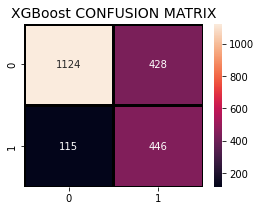

오차 행렬
[[1124  428]
 [ 115  446]]
정확도: 0.74, 정밀도: 0.51, 재현율: 0.80,    F1: 0.62,  AUC:0.85


In [38]:
from xgboost import XGBClassifier

xgb_model=XGBClassifier(n_estimators=500,random_state=156,learning_rate = 0.02, max_depth=5)
xgb_model.fit(X_train_o, y_train_o, early_stopping_rounds=100,
             eval_metric='auc', eval_set=[(X_train_o,y_train_o),(X_test,y_test)])
xgb_pred = xgb_model.predict(X_test)
xgb_pred_proba = xgb_model.predict_proba(X_test)[:,1]

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, xgb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("XGBoost CONFUSION MATRIX",fontsize=14)
plt.show()

get_clf_eval(y_test, xgb_pred, xgb_pred_proba)

### XGBM_GridSearch()

In [ ]:
from xgboost import XGBClassifier
xgb_clf =XGBClassifier(n_estimators=100,learning_rate = 0.02)

params = {'max_depth': [4,6,8,10,12,14,16],  
          'min_child_weight':[1,3], 
          'colsample_bytree': [0.25,0.5, 0.75]}

xgb_cv = GridSearchCV(xgb_clf, param_grid=params, cv=5, verbose=1 )

xgb_cv.fit(X_train_o,y_train_o, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train_o, y_train_o),(X_test,y_test)])


xgb_roc_score = roc_auc_score(y_test, xgb_cv.predict_proba(X_test)[:,1], average ='macro')
print("ROC AUC: {0:4f}".format(xgb_roc_score))
print('GridSearchCV 최적 파라미터:', xgb_cv.best_params_)

### XGBM 모델개선


In [ ]:
from xgboost import XGBClassifier

xgb_model_r=XGBClassifier( learning_rate = 0.02, colsample_bytree = 0.5,min_child_weight =1)

xgb_model_r.fit(X_train_o, y_train_o, early_stopping_rounds=200,
             eval_metric='auc', eval_set=[(X_train_o,y_train_o),(X_test,y_test)])
xgb_pred_r = xgb_model_r.predict(X_test)
xgb_pred_proba_r = xgb_model_r.predict_proba(X_test)[:,1]

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, xgb_pred_r),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("XGBoost CONFUSION MATRIX",fontsize=14)
plt.show()

get_clf_eval(y_test, xgb_pred_r, xgb_pred_proba_r)

In [ ]:
precision_recall_curve_plot( y_test, xgb_pred_proba_r)

### XGBoost Feature_importance

In [ ]:
from xgboost import plot_importance
%matplotlib inline

fit,ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model_r,ax=ax)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

# 앞으로 계속 중요도 시각화를 죽 계속할 건데 이 코드를 계속 비슷하게 사용한다고 생각하면 됨
ftr_importances_values = xgb_model_r.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
# sort_values() 쉽게 하기 위해서 시리즈로 만들고, 
# 최고 중요도가 높은 20개 피처들만 추출
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
# x축은 중요도 값, y축은 ftr_top20 시리즈의 index
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

## LGBM

In [ ]:
from lightgbm import LGBMClassifier
from lightgbm import plot_importance

lgbm_model = LGBMClassifier(n_estimators=400)

evals = [(X_test, y_test)]
#eval_metric = 평가
lgbm_model.fit(X_train_o, y_train_o, early_stopping_rounds=200,
                 eval_metric='auc', eval_set=evals, verbose=True)
lgbm_pred = lgbm_model.predict(X_test)
lgbm_pred_proba = lgbm_model.predict_proba(X_test)[:,1]

# Confusion_Maxtrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lgbm_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LGBM CONFUSION MATRIX",fontsize=14)
plt.show()

get_clf_eval(y_test,lgbm_pred,lgbm_pred_proba)

In [ ]:
from sklearn.model_selection import GridSearchCV

lgbm_clf = LGBMClassifier(n_estimators=200, learning_rate=0.02)

params = {'num_leaves': [2,4,8,16,20],
          'max_depth':[2,4,6,8,10,12,14,16],
          'min_child_samples':[20,40,60, 100],
          'subsample':[0.8, 1,1.2]}


lgbm_cv = GridSearchCV(lgbm_clf, param_grid=params, cv=5)
lgbm_cv.fit(X_train_o, y_train_o, early_stopping_rounds=100, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', lgbm_cv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, lgbm_cv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.2f}'.format(lgbm_roc_score))


In [ ]:
lgbm_model_r = LGBMClassifier(num_leaves = 2,colsample_bytree = 0.5,min_child_weight =1)

evals = [(X_test, y_test)]
#eval_metric = 평가
lgbm_model_r.fit(X_train_o, y_train_o, early_stopping_rounds=300,
                 eval_metric='auc', eval_set=evals, verbose=1)
lgbm_pred_r = lgbm_model_r.predict(X_test)
lgbm_pred_proba_r = lgbm_model_r.predict_proba(X_test)[:,1]

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lgbm_pred_r),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LGBM CONFUSION MATRIX",fontsize=14)
plt.show()

get_clf_eval(y_test,lgbm_pred_r,lgbm_pred_proba_r)

In [ ]:
precision_recall_curve_plot( y_test, lgbm_pred_proba_r)

In [ ]:
from lightgbm import plot_importance
%matplotlib inline

fit,ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_model_r,ax=ax)

## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train_o,y_train_o)
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:,1]

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, rf_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RandomForest CONFUSION MATRIX",fontsize=14)
plt.show()

get_clf_eval(y_test,rf_pred,rf_pred_proba)

### RandomForest Gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [2,4,6,8,10],
    'min_samples_leaf' : [2,4, 6, 8],
    'min_samples_split' : [2,4,8,12,16]}

rf_cv = GridSearchCV(rf_model, param_grid=params, scoring='recall', cv=5, n_jobs=-1)
rf_cv.fit(X_train_o , y_train_o)
rf_pred_cv = rf_model.predict(X_test)

print('GridSearchCV 최고 재현율 수치:{0:.2f}'.format(rf_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', rf_cv.best_params_)

### RandomForest 모델개선

In [ ]:
rf_model_r = RandomForestClassifier(n_estimators=100,random_state=156,  max_depth=4, min_samples_leaf=2, min_samples_split=2)
rf_model_r.fit(X_train_o,y_train_o)
rf_pred_r = rf_model_r.predict(X_test)
rf_pred_proba_r = rf_model_r.predict_proba(X_test)[:,1]

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, rf_pred_r),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RandomForest CONFUSION MATRIX",fontsize=14)
plt.show()

get_clf_eval(y_test, rf_pred_r, rf_pred_proba_r)

In [ ]:
precision_recall_curve_plot( y_test, rf_pred_proba_r)

In [ ]:
### RandomForest Feature_Importances

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

# 앞으로 계속 중요도 시각화를 죽 계속할 건데 이 코드를 계속 비슷하게 사용한다고 생각하면 됨
ftr_importances_values = rf_model_r.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
# sort_values() 쉽게 하기 위해서 시리즈로 만들고, 
# 최고 중요도가 높은 20개 피처들만 추출
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
# x축은 중요도 값, y축은 ftr_top20 시리즈의 index
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

## LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression().fit(X_train_o,y_train_o)
lr_pred = lr_model.predict(X_test)
lr_pred_proba = lr_model.predict_proba(X_test)[:,1]

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LogisticRegression CONFUSION MATRIX",fontsize=14)
plt.show()

get_clf_eval(y_test,lr_pred,lr_pred_proba)

### LogisticRegression - GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'penalty' : ['l2','l1'],
          'C':[0.01, 0.1, 1, 1, 3, 5, 10, 15, 20]}
lr_cv = GridSearchCV(lr_model, param_grid=params, scoring='recall', cv=5)
lr_cv.fit(X_train_o,y_train_o)
lr_pred_cv = lr_model.predict(X_test)
print('최적 하이퍼 파라미터:{0}, \n최적 재현율:{1:.3f}'.format(lr_cv.best_params_,lr_cv.best_score_))

### LogsticRegression 모델개선

In [ ]:
lr_model_r = LogisticRegression(C=1, penalty='l2')
lr_model_r.fit(X_train_o,y_train_o)
lr_pred_r = lr_model_r.predict(X_test)
lr_pred_proba_r = lr_model_r.predict_proba(X_test)[:,1]

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred_r),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LogisticRegression CONFUSION MATRIX",fontsize=14)
plt.show()

get_clf_eval(y_test,lr_pred,lr_pred_proba)

In [ ]:
precision_recall_curve_plot( y_test, lr_pred_proba_r)

## 나이브베이즈(BernoulliNB)

In [ ]:
from sklearn.naive_bayes import BernoulliNB

nb_model = BernoulliNB()
nb_model.fit(X_train_o,y_train_o)
nb_pred = nb_model.predict(X_test)
nb_pred_proba = nb_model.predict_proba(X_test)[:,1]

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, nb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("NB CONFUSION MATRIX",fontsize=14)
plt.show()

get_clf_eval(y_test,nb_pred,nb_pred_proba)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'alpha': np.linspace(0.01,0.1,1,10), 'binarize':(0.5,1,2,3)}]
nb_cv = GridSearchCV(estimator = nb_model, param_grid=param_grid, scoring='recall', cv=5, n_jobs=-1)
nb_cv.fit(X_train_o,y_train_o)
nb_cv_pred = nb_model.predict(X_test)
print('최적 하이퍼 파라미터:{0}, \n최적 재현율:{1:.2f}'.format(nb_cv.best_params_,nb_cv.best_score_))

In [ ]:
from sklearn.naive_bayes import BernoulliNB

nb_model_r = BernoulliNB(alpha=0.01,binarize=3)
nb_model_r.fit(X_train_o,y_train_o)
nb_pred_r = nb_model_r.predict(X_test)
nb_pred_proba_r = nb_model_r.predict_proba(X_test)[:,1]

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, nb_pred_r),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("NB CONFUSION MATRIX",fontsize=14)
plt.show()

get_clf_eval(y_test,nb_pred_r,nb_pred_proba_r)

In [ ]:
precision_recall_curve_plot( y_test, nb_pred_proba_r)

## SVM

In [ ]:
from sklearn.svm import SVC  

svm_model = SVC().fit(X_train_o, y_train_o)
svm_pred = svm_model.predict(X_test)

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, svm_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("SVM CONFUSION MATRIX",fontsize=14)
plt.show()

get_clf_val(y_test,svm_pred)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = { 'C':[0.1,1,3],
          'kernel':['rbf','poly','sigmoid','linear'],
          'degree':[1,2],'gamma': [0.001, 0.0001]}
svm_cv = GridSearchCV(svm_model,param_grid=params, scoring='recall', cv=5, verbose=1,n_jobs=-1)
svm_cv.fit(X_train_o,y_train_o)
svm_pred_r = svm_model.predict(X_test)

print('GridSearchCV 최고 재현율 수치:{0:.2f}'.format(svm_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', svm_cv.best_params_)

- kernel = poly로 세팅하면 90%이상의 높은 재현율이 나오지만 poly 는 차원을 펴주는 역활이라고 해서 미적용

In [ ]:
from sklearn.svm import SVC  


svm_model_r = SVC(kernel='rbf',gamma=0.001, degree=2, C=1).fit(X_train_o, y_train_o)
svm_pred_r = svm_model_r.predict(X_test)

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, svm_pred_r),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("SVM CONFUSION MATRIX",fontsize=14)
plt.show()

get_clf_val(y_test,svm_pred_r)

In [ ]:
precision_recall_curve_plot( y_test, svm_pred_r)